In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as data_web
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import scipy.spatial
from scipy.spatial.distance import directed_hausdorff
import yfinance as yf
from numpy.fft import fft, ifft

In [24]:
class Tembedding: 
    def __init__(self, start, end, typeS, number, sector = 'Technology'):
        diccionarioStocks = { 'Crypto':['BTC'], 'Forex': ['DXY'], 'Stock': { 'SPY': ['SPY'], 'Nasdaq': ['^IXIC'], 'BasicMaterials': ['NEM', 'GOLD', 'FNV'],'Communication':['GOOG', 'VZ', 'NFLX', 'BCE'], 'ComsumerCyclical': ['HD', 'BABA', 'MCD', 'AZO'], 'ConsumerDefensive': ['WMT', 'PG', 'KO', 'PEP', 'TGT', 'MO']  ,'Energy':['SHEL'], 'Financial': ['RY', 'GS', 'BTO', 'SAN', 'MFC'], 'Healthcare': ['JNJ', 'MRK', 'TMO'], 'Industrials': ['UPS', 'LMT'], 'RealEstate': ['CCI', 'SPG'], 'Technology': ['AAPL', 'TSM','QCOM', 'AMZN', 'AMD'], 'Utilities': ['NEE', 'DUK', 'SO'] } }
        if typeS != 'Stock':
            if number < len(diccionarioStocks[typeS]):
                self.tickers = np.random.permutation(diccionarioStocks[typeS])[:number]
            else:
                print('El numero de tickers que escogiste es mayor al que tenemos, así que te muestro todos')
                self.tickers = np.random.permutation(diccionarioStocks[typeS])
        else:
            if number < len(diccionarioStocks[typeS][sector]):    
                self.tickers = np.random.permutation(diccionarioStocks[typeS][sector])[:number]
            else:
                print('El numero de tickers que escogiste es mayor al que tenemos, así que te muestro todos')
                self.tickers = np.random.permutation(diccionarioStocks[typeS][sector])
        self.tseries = yf.download(list(self.tickers), start = start, end = end)['Adj Close'].dropna().reset_index(drop=True)

    def hausdorff(self, ticker_1, ticker_2, lagtime = 1):
        self.u = self.tseries[ticker_1]
        self.v = self.tseries[ticker_2]
        self.u = np.transpose( np.array([  self.u[range(0, len(self.u) - lagtime, 1)], self.u[range(lagtime, len(self.u), 1)] ] ) )
        self.v = np.transpose( np.array([  self.v[range(0, len(self.v) - lagtime, 1)], self.v[range(lagtime, len(self.v), 1)] ] ) )
        self.hausdorff_XY = directed_hausdorff(self.u, self.v)[0]
        self.hausdorff_YX = directed_hausdorff(self.v, self.u)[0]
        self.output = max(self.hausdorff_XY, self.hausdorff_YX)    
        
    def graph(self):
        t_embedding = self.u
        self.Xticker = t_embedding[:,0]
        self.Yticker = t_embedding[:,1]
        self.color_2d = np.linspace(0,1, num=len(self.Xticker))
        plt.scatter(self.Xticker, self.Yticker, c = self.color_2d)
        plt.show()
    def graph3d(self):
        ticker_embedding = self.u
        self.X3d = ticker_embedding[:,0]
        self.Y3d = ticker_embedding[:,1]
        self.Z3d = np.arange(len(self.X3d))
        self.pdticker = pd.DataFrame([Topo.X3d, Topo.Y3d, Topo.Z3d], index=['x','y','z']).T

        fig = px.scatter_3d(self.pdticker, x='x', y='y', z='z', color = self.pdticker['z'])
        fig.show()

El numero de tickers que escogiste es mayor al que tenemos, así que te muestro todos
[*********************100%***********************]  5 of 5 completed


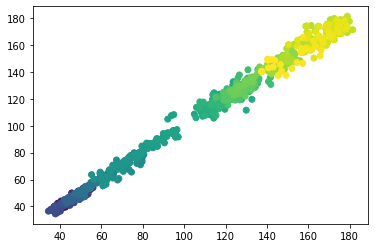

'\nTopo.hausdorff_XY #Resultado de Hausdorff (X, Y)\nTopo.hausdorff_YX #Resultado de Hausdorff (Y, X)\nTopo.u #Topo-embedding del primer ticker\nTopo.v #Topo-embedding del segundo ticker\nTopo.graph(Topo.u) #Grafica el topo-embedding del primer ticker 2D\nTopo.graph(Topo.v) #Grafica el topo-embedding del segundo ticker 2D\nTopo.graph3D(Topo.u) #Grafica el topo-embedding del primer ticker 3D\nTopo.graph3D(Topo.v) #Grafica el topo-embedding del primer ticker 3D\n'

In [25]:
# Topo = Tembedding(['AAPL', 'KR', 'JNJ', 'ICE', 'TGT', 'BABA', 'LUNA', 'BTC', 'EURUSD=X'], '2018-01-01', '2022-06-02') #Cargamos Ticker en los periodos descritos 
Topo = Tembedding('2018-01-01', '2022-06-02', 'Stock', 10, sector='Technology')
Topo.hausdorff('AAPL', 'AMD', 3) #Seleccionamos los dos ticker que haremos topo-embedding y el lagtime
Topo.output #Resultado de Hausdorff
Topo.graph() #Grafica el topo-embedding del primer ticker 2D
Topo.graph3d() #Grafica el topo-embedding del primer ticker 3D


'''
Topo.hausdorff_XY #Resultado de Hausdorff (X, Y)
Topo.hausdorff_YX #Resultado de Hausdorff (Y, X)
Topo.u #Topo-embedding del primer ticker
Topo.v #Topo-embedding del segundo ticker
Topo.graph(Topo.u) #Grafica el topo-embedding del primer ticker 2D
Topo.graph(Topo.v) #Grafica el topo-embedding del segundo ticker 2D
Topo.graph3D(Topo.u) #Grafica el topo-embedding del primer ticker 3D
Topo.graph3D(Topo.v) #Grafica el topo-embedding del primer ticker 3D
'''